In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

W_values = []
B_values = []



In [54]:
def compute_cost(w, b, x, y):
    cost = 0
    for i in range(len(x)):
        newcost = ((np.dot(w, x[i]) + b) - y[i]) ** 2
        cost += newcost
    return cost / (2 * len(x))

In [55]:
def train(x, y, w, b, alpha, epochs):
    cost_values = []
    for i in range(epochs):
        d_dw, d_db = dydx(w, b, x, y)
        w = w - (alpha * d_dw)
        b = b - (alpha * d_db)
        cost = compute_cost(w, b, x, y)
        W_values.append(w)
        B_values.append(b)
        cost_values.append(cost)
    return w, b, cost_values

In [56]:
def predict(w, b, x):
    return np.dot(w, x.T) + b
def readcsv():
    df = pd.read_csv('PuvithMl_Credit.csv')
    x = df[['INCOMEMAIN', 'SAVINGMAIN', 'DEBTMAIN']].values.astype(float)
    y = df['CREDITS'].values.astype(float)
    return x, y

In [57]:

def dydx(w, b, x, y):
    d_dw = np.zeros_like(w)
    d_db = 0
    for i in range(len(x)):
        dw_dw = np.dot(x[i], w) + b - y[i]
        db_db = np.dot(x[i], w) + b - y[i]
        d_dw += dw_dw * x[i]
        d_db += db_db
    d_db /= len(x)
    d_dw /= len(x)
    return d_dw, d_db

In [102]:
def plot_cost(cost_values, new_values, actual):
    fig, (plt2, plt1) = plt.subplots(1, 2, constrained_layout=False, figsize=(12, 4))
    
    
    x_values = range(len(new_values))
    plt1.scatter(range(len(actual)), actual, label='Actual')
    plt1.scatter(range(len(new_values)), new_values, label='Predicted' ,c='r')
    
    plt1.set_title('Predicted vs. Actual')
    plt1.legend()

    plt2.plot(cost_values)
    plt2.set_xlabel('Epoch')
    plt2.set_ylabel('Cost')
    plt2.set_title('Cost vs. Epoch')

    plt.show()


In [111]:
x, y = readcsv()
epochs = 7000

w = np.zeros((3,))
alpha = 0.1

w, b, cost_values = train(x, y, w, b, alpha, epochs)


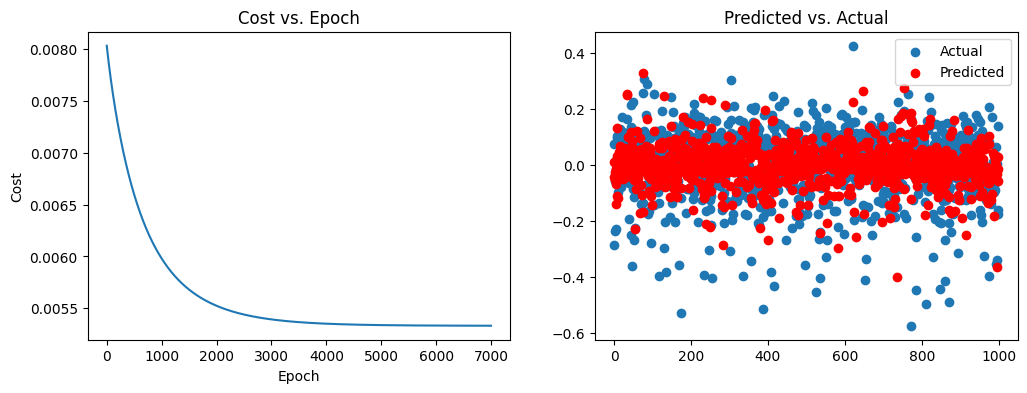

In [112]:
new_values = []  # Initialize list to store predicted values
actual_values = []  


for i in range(len(x)):
    predicted_value = predict(w, b, x[i]) 
    new_values.append(predicted_value)
    


plot_cost(cost_values, new_values, y)

In [ ]:
def values